In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import neighbors,preprocessing

In [21]:
data=pd.read_excel('电视剧播放数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
data=data.loc[(data['点赞']<=2000000) & (data['差评']<=2000000)]
data.head()

,剧名,类型,播放量,点赞,差评,得分,采集日期
0,花千骨2015,言情剧\n/\n穿越剧\n/\n网络剧,3.07亿,992342,357808.0,7.3,2015-9-23 23:48:48
1,还珠格格2015,古装剧\n\n/\n喜剧\n\n/\n网络剧,73.3万,2352,7240.0,2.5,2015-9-23 23:48:48
2,天局,武侠剧\n/\n古装剧\n/\n悬疑剧\n/\n网络剧,3454万,38746,3593.0,9.2,2015-9-23 23:48:52
3,明若晓溪,青春剧\n/\n言情剧\n/\n偶像剧,1.57亿,518660,72508.0,8.8,2015-9-23 23:48:51
4,多情江山,言情剧\n/\n古装剧\n/\n宫廷剧,1126万,22553,6955.0,7.6,2015-9-23 23:48:52


In [22]:
X=data.loc[:,['点赞','差评']]
Y=data.loc[:,'得分']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123) 
modelKNN=neighbors.KNeighborsRegressor(n_neighbors=20)
modelKNN.fit(X_train,Y_train)
print('K-近邻：测试精度=%f总预测精度=%f'%(modelKNN.score(X_test,Y_test),modelKNN.score(X,Y)))
modelLR=LM.LinearRegression()
modelLR.fit(X_train,Y_train)
print('一般线性回归模型：测试精度=%f;总预测精度=%f'%(modelLR.score(X_test,Y_test),modelLR.score(X,Y)))

K-近邻：测试精度=0.969754总预测精度=0.971691
一般线性回归模型：测试精度=0.179853;总预测精度=0.176142


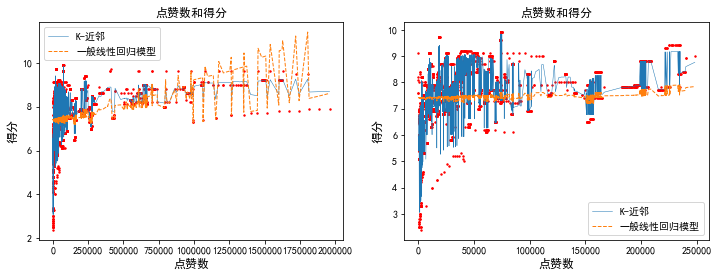

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].scatter(X.iloc[:,0],Y,s=2,c='r')
index = np.argsort(X.iloc[:,0])
axes[0].plot(X.iloc[index,0],modelKNN.predict(X.iloc[index,:]),linewidth=0.5,label="K-近邻")
axes[0].plot(X.iloc[index,0],modelLR.predict(X.iloc[index,:]),linestyle='--',linewidth=1,label="一般线性回归模型")
axes[0].set_title('点赞数和得分',fontsize=12)
axes[0].set_xlabel('点赞数',fontsize=12)
axes[0].set_ylabel('得分',fontsize=12)
axes[0].legend()

data=data.loc[(data['点赞']<=250000)]
axes[1].scatter(data['点赞'],data['得分'],s=2,c='r')
T=X.loc[(X['点赞']<=250000)]
index = np.argsort(T.iloc[:,0])
axes[1].plot(T.iloc[index,0],modelKNN.predict(T.iloc[index,:]),linewidth=0.5,label="K-近邻")
axes[1].plot(T.iloc[index,0],modelLR.predict(T.iloc[index,:]),linestyle='--',linewidth=1,label="一般线性回归模型")
axes[1].set_title('点赞数和得分',fontsize=12)
axes[1].set_xlabel('点赞数',fontsize=12)
axes[1].set_ylabel('得分',fontsize=12)
axes[1].legend()
